In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [3]:
# Set Seaborn style for beautiful plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Load the dataset
data = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')


In [4]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:

# 2. Exploratory Data Analysis (EDA)
# Display basic info
print("Dataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [6]:
print("\nFirst 5 Rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



First 5 Rows:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


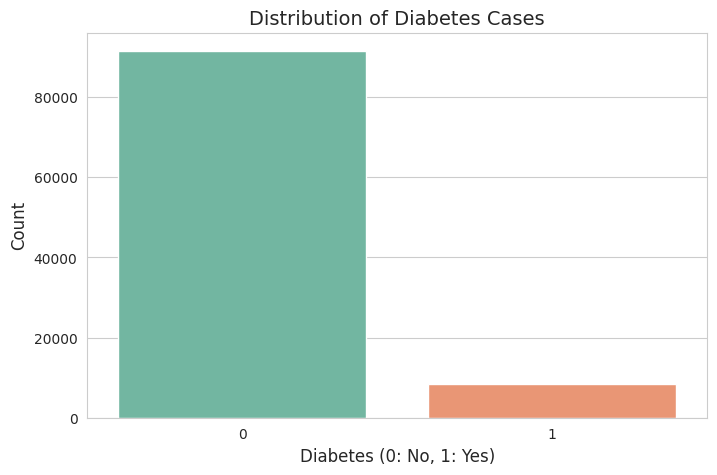

In [7]:

# Plot 1: Distribution of Diabetes (Target Variable)
plt.figure(figsize=(8, 5))
sns.countplot(x='diabetes', data=data, palette='Set2')
plt.title('Distribution of Diabetes Cases', fontsize=14)
plt.xlabel('Diabetes (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('diabetes_distribution.png')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

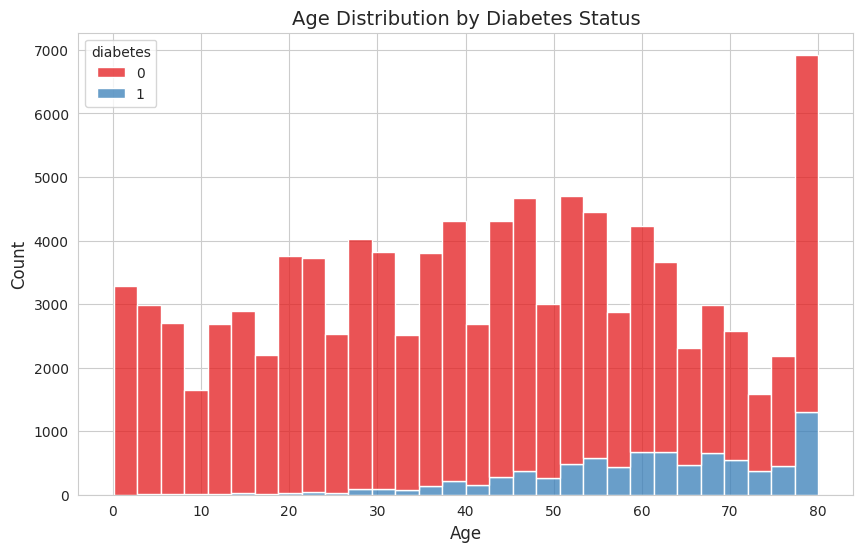

In [8]:

# Plot 2: Age Distribution by Diabetes Status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='diabetes', multiple='stack', palette='Set1', bins=30)
plt.title('Age Distribution by Diabetes Status', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('age_distribution.png')
plt.show()


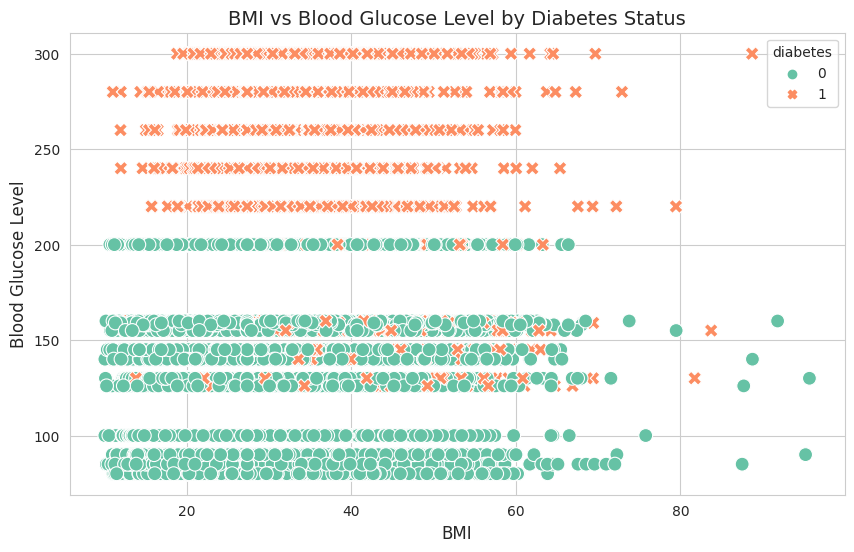

In [9]:

# Plot 3: BMI vs Blood Glucose Level (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='blood_glucose_level', hue='diabetes', style='diabetes', 
                data=data, palette='Set2', s=100)
plt.title('BMI vs Blood Glucose Level by Diabetes Status', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Blood Glucose Level', fontsize=12)
plt.savefig('bmi_vs_glucose.png')
plt.show()


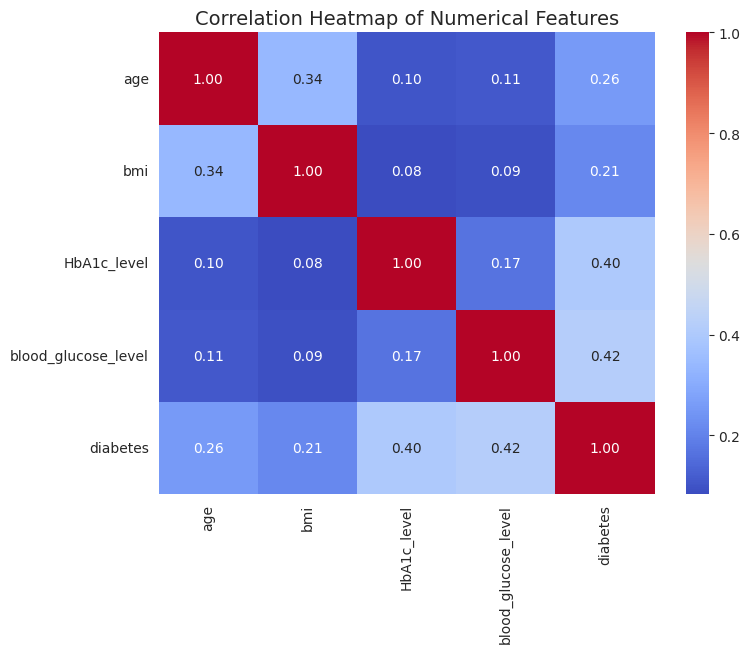

In [10]:

# Plot 4: Correlation Heatmap (only numerical features)
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.savefig('correlation_heatmap.png')
plt.show()


In [11]:

# 3. Data Preprocessing
# Encode categorical variables (gender, smoking_history)
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['smoking_history'] = le.fit_transform(data['smoking_history'])

# Define features (X) and target (y)
X = data.drop('diabetes', axis=1)
y = data['diabetes']


In [12]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [14]:
# 4. Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:

# 5. Model Evaluation
y_pred = rf_model.predict(X_test)


In [16]:

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")



Model Performance:
Accuracy: 0.97
Precision: 0.95
Recall: 0.69
F1-Score: 0.80


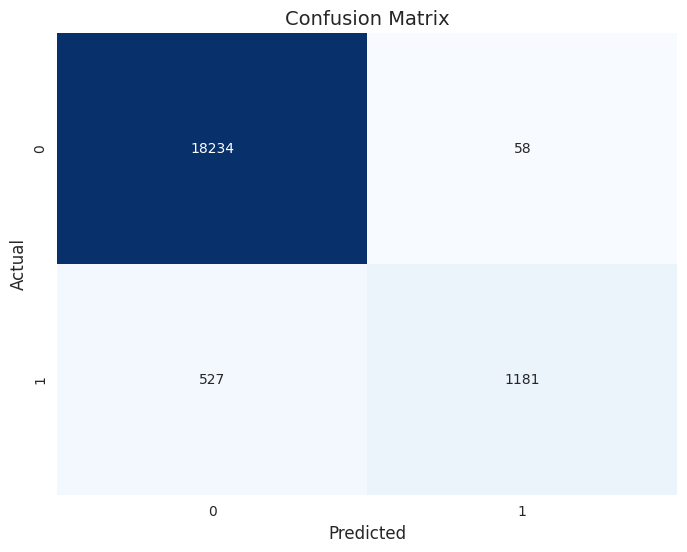

In [17]:

# Plot 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.savefig('confusion_matrix.png')
plt.show()


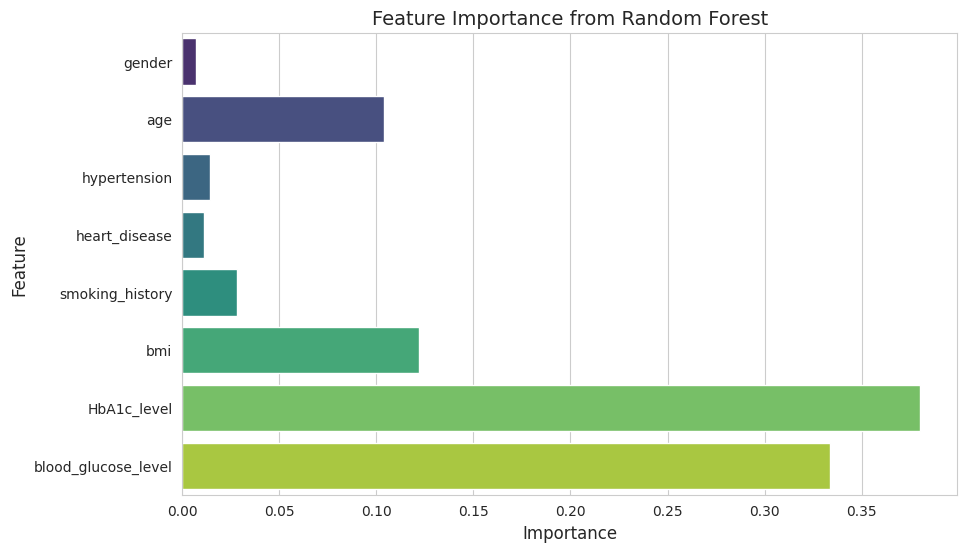

In [18]:

# 6. Feature Importance
feature_names = X.columns
importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance from Random Forest', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.savefig('feature_importance.png')
plt.show()


In [19]:

# 7. Summary
print("\nProject Summary:")
print("The Random Forest model successfully predicts diabetes with high accuracy.")
print("Key findings from EDA: Higher BMI, blood glucose, and HbA1c levels are strongly correlated with diabetes.")
print("The model can be used to identify at-risk individuals based on medical and demographic data.")


Project Summary:
The Random Forest model successfully predicts diabetes with high accuracy.
Key findings from EDA: Higher BMI, blood glucose, and HbA1c levels are strongly correlated with diabetes.
The model can be used to identify at-risk individuals based on medical and demographic data.
